# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

con = sa.create_engine('sqlite:///DatosCaso1/airbnb.db')

df = pd.read_sql('df_ready', con = con)

#Minicubo:

metrics = ['total_price','price']
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicube_price = df[dimensions + metrics]

minicube_price = minicube_price.melt(id_vars=['total_price','price'])

minicube_price = minicube_price.groupby(['variable','value'])[['total_price','price']].agg('median')

In [2]:
df = pd.read_sql('df_ready', con)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         20634 non-null  int64  
 1   index                           20634 non-null  int64  
 2   id                              20634 non-null  int64  
 3   name                            20634 non-null  object 
 4   host_id                         20634 non-null  int64  
 5   neighbourhood_group             20634 non-null  object 
 6   neighbourhood                   20634 non-null  object 
 7   latitude                        20634 non-null  float64
 8   longitude                       20634 non-null  float64
 9   room_type                       20634 non-null  object 
 10  price                           20634 non-null  float64
 11  minimum_nights                  20634 non-null  int64  
 12  calculated_host_listings_count  

# Objectives

* Analyze available public data sources to find insights that help understand the characteristics of the market in Madrid
* Guide the valuation team's research work
* Research specially in terms of the main factors: rental price, occupancy levels, and purchase price

# Conclusions

* Ten neighborhoods have been identified as the focus of the search.
* It is recommended to look for properties with a room that can accommodate three guests.
* It is recommended to look for properties that are located in one of the identified neighborhoods but are not necessarily close to points of interest.

## Best neighborhoods

Ten neighborhoods have been identified that, a priori, can maximize the cost-income ratio.

We can also segment them by the type of property we are interested in investing in, into four main groups.

These are the 10 neighborhoods where we can start looking for specific opportunities:
* Low investment: Rosas, Simancas, Comillas, Los Rosales
* Medium investment: Argüelles, Costillares, El Goloso
* Medium-high investment: Niño Jesús, El Viso
* High investment: Recoletos

temp = df.groupby('neighbourhood')[['total_price','price']].median()

plt.figure(figsize = (16,12))
sns.set_style('darkgrid')
sns.scatterplot(data = temp, x = 'price', y = 'total_price')

for each in range(0,temp.shape[0]):
    plt.text(temp.price.iloc[each], temp.total_price.iloc[each], temp.index[each])

## 3 Guests

* The number of guests that maximizes the purchase price paid is 3.

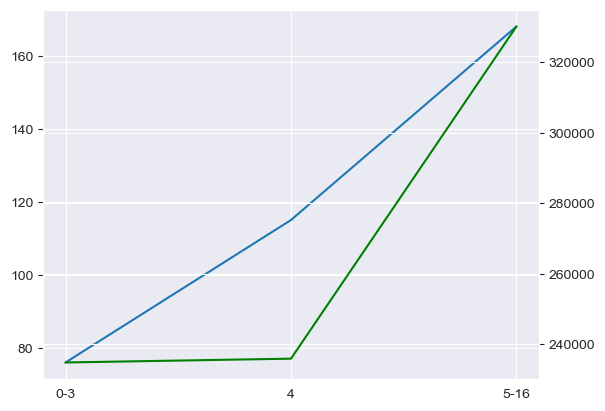

In [4]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['accommodates_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_disc'].price,color = 'green');

## Identified neighborhoods are not necessarily close to points of interest

* They are expected to have a lower purchase price
* It appears that proximity to points of interest does not have a significant impact on rental prices

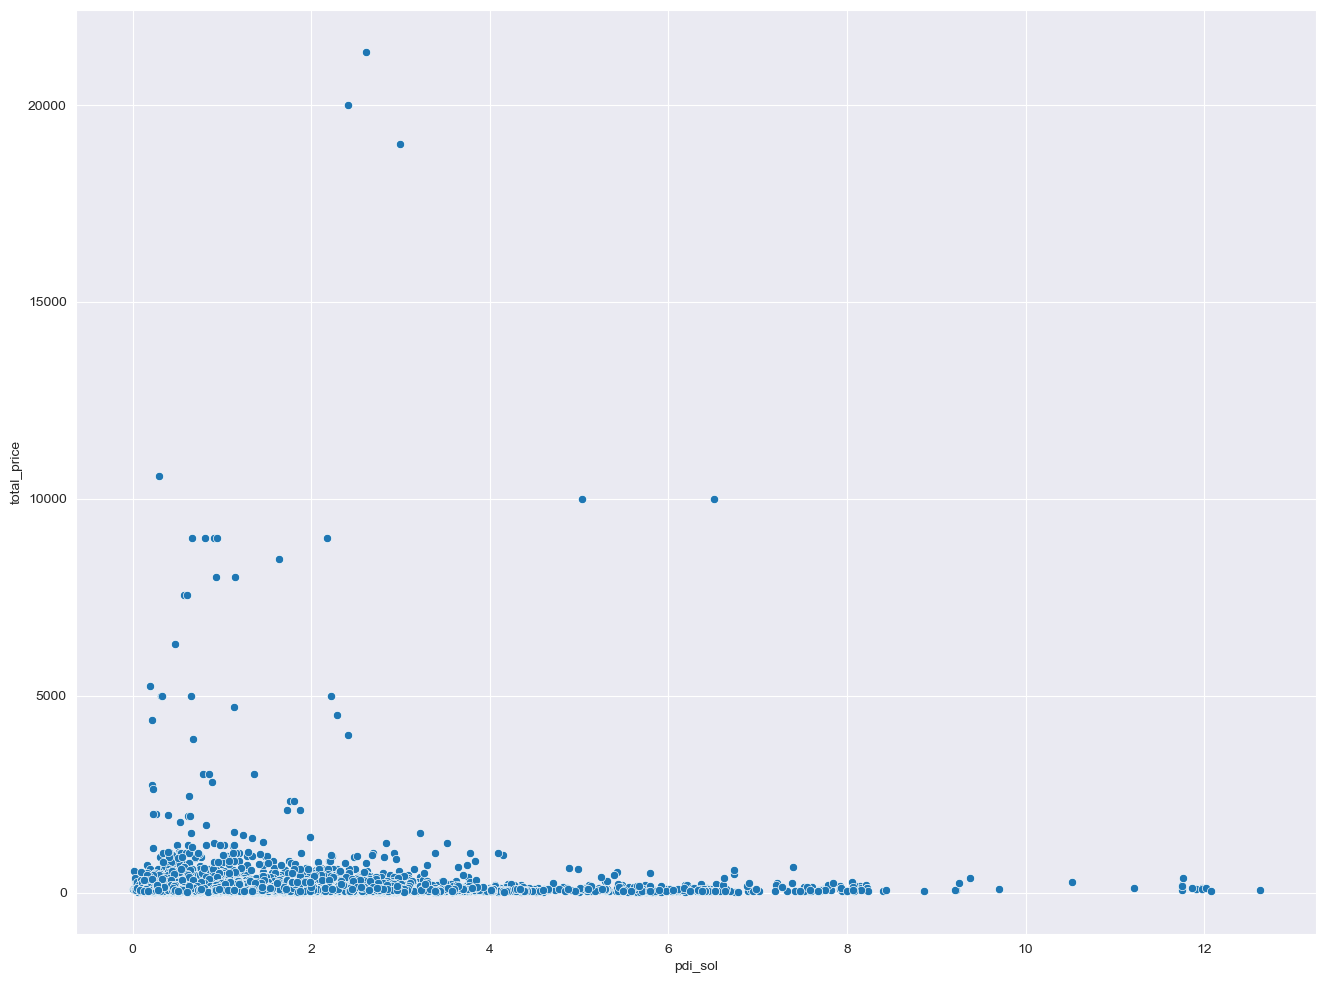

In [7]:
selection = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(selection)], x = 'pdi_sol', y = 'total_price');